## Creación y Backtesting de una Estrategia Mean-Reversion usando Bandas de Bollinger

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

In [3]:
data = pd.read_csv("intraday.csv", parse_dates = ["time"], index_col = "time")

In [4]:
data

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


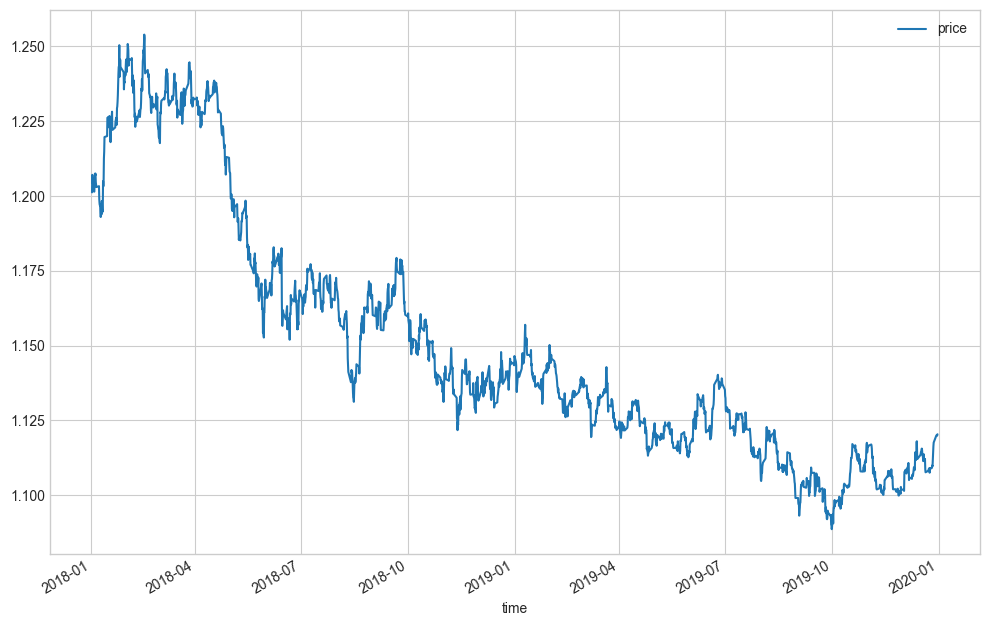

In [6]:
data.plot(figsize = (12, 8))
plt.show()

<Axes: xlabel='time'>

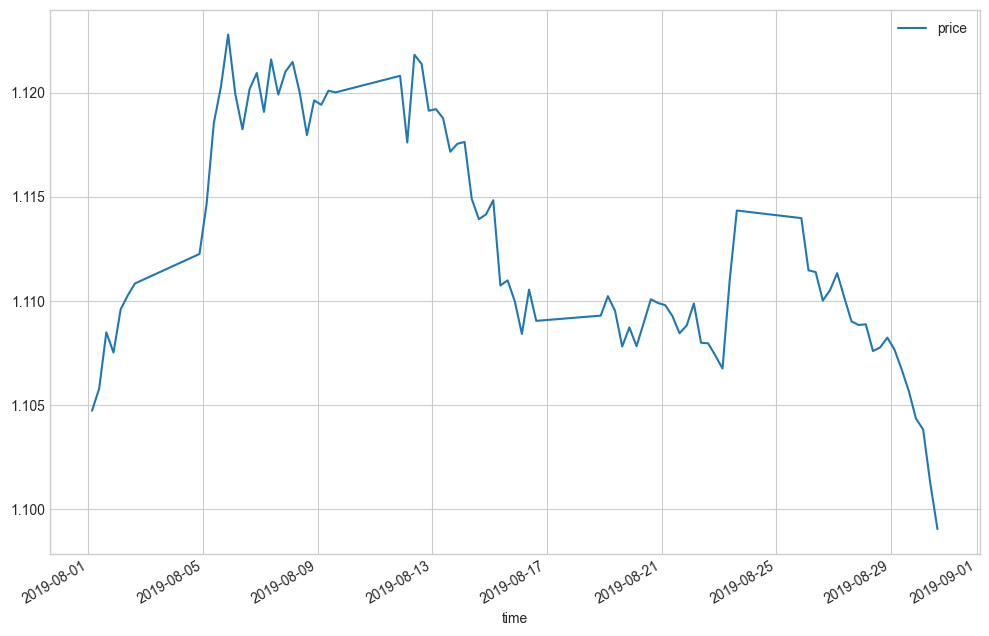

In [7]:
data.loc["2019-08"].plot(figsize = (12, 8))

In [8]:
data["returns"] = np.log(data.div(data.shift(1)))

In [9]:
# mostrar los datos
data

,price,returns
time,,
2018-01-01 22:00:00+00:00,1.201205,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


# Definir una Estrategia Mean-Reversion con Bandas de Bollinger (1ra Parte)

__Mean Reversion__: Los instrumentos financieros en ciertos períodos de tiempo son sobrevendidos/sobrecomprados y luego regresan a precios promedios.

__Bandas de Bollinger__ Consisten de una SMA (p.e. 30) y unas bandas Superior e Inferior a las cuales se les suma o se les resta 2 desviaciones estándar, respectivamente.

In [10]:
# definir la ventana y el número de desviaciones estandar
SMA = 30
dev = 2

In [11]:
# crear la columna de la media móvil simple
data["SMA"] = data["price"].rolling(SMA).mean()

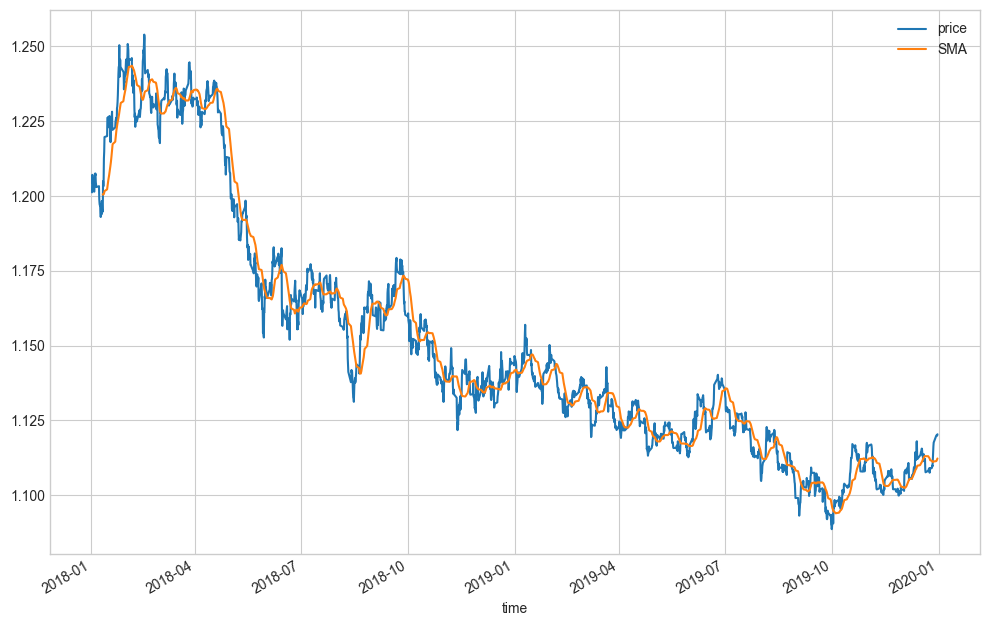

In [12]:
# grafica sencilla para visualizar
data[["price", "SMA"]].plot(figsize = (12, 8))
plt.show()

<Axes: xlabel='time'>

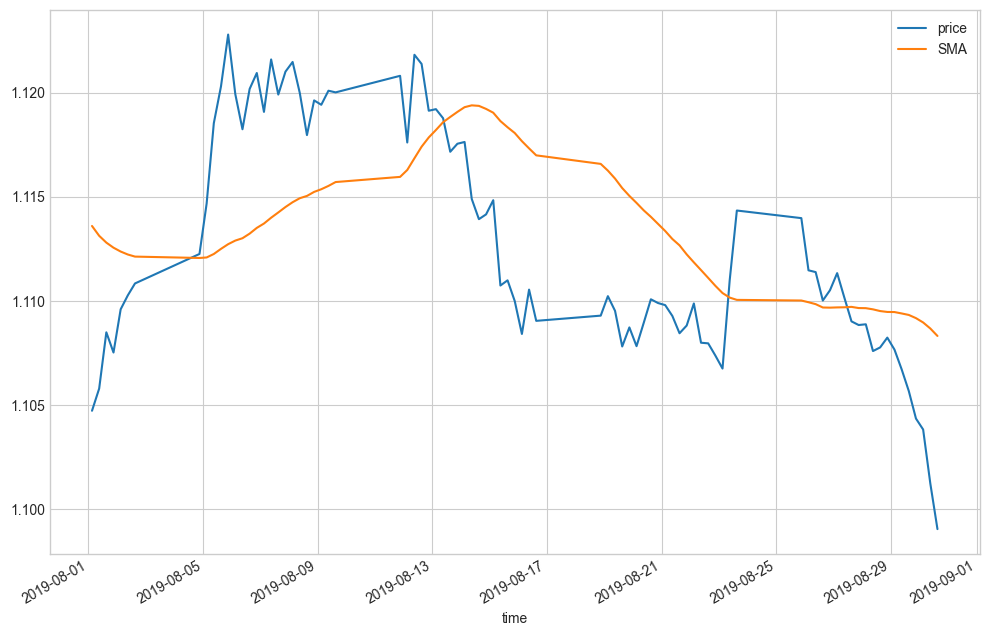

In [13]:
# hacer zoom en un mes cualquiera para mejor interpretación y visualización
data.loc["2019-08", ["price", "SMA"]].plot(figsize = (12, 8))

In [14]:
# calcular las bandas, primero la desviación estándar
data["price"].rolling(SMA).std()
# la expresión anterior no modifica la columna price porque no está igualada a una variable 

time
2018-01-01 22:00:00+00:00         NaN
2018-01-02 04:00:00+00:00         NaN
2018-01-02 10:00:00+00:00         NaN
2018-01-02 16:00:00+00:00         NaN
2018-01-02 22:00:00+00:00         NaN
                               ...   
2019-12-29 22:00:00+00:00    0.003088
2019-12-30 04:00:00+00:00    0.003400
2019-12-30 10:00:00+00:00    0.003729
2019-12-30 16:00:00+00:00    0.004008
2019-12-30 22:00:00+00:00    0.004288
Name: price, Length: 2070, dtype: float64

<Axes: xlabel='time'>

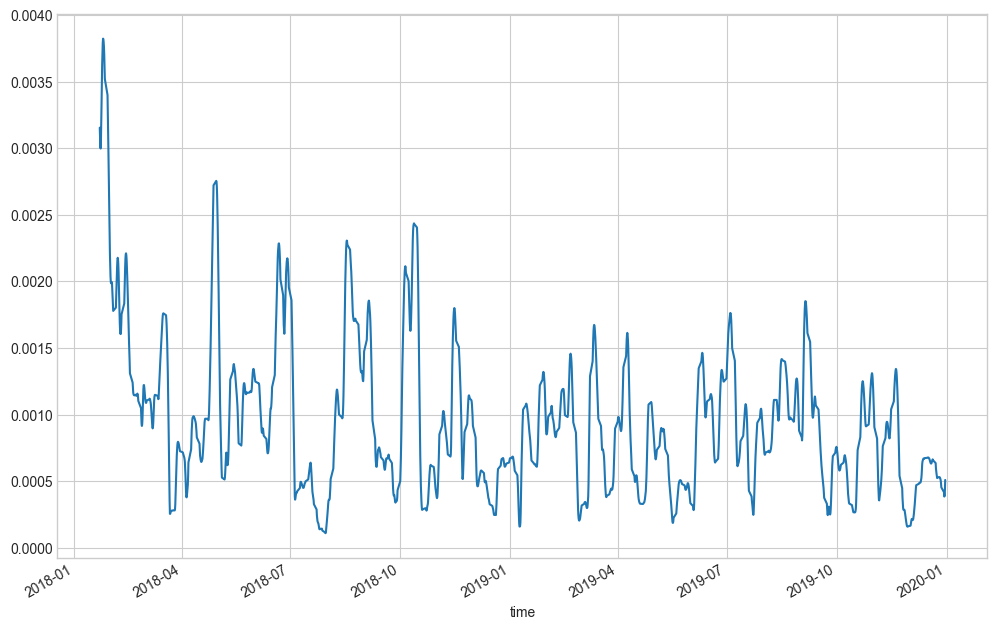

In [15]:
 # visualizar la desviación estándar
data["price"].rolling(SMA).std().rolling(SMA).std().plot(figsize = (12, 8))

En la gráfica anterior que muestra el valor de la desviación estándar entre las fechas 2018 a 2020, con granuloridad de 6 horas diarias, se observa un comportamiento oscilatorio. 

In [16]:
# ahora se calculan las bandas
data["Lower"] = data["SMA"] - data["price"]. rolling(SMA).std() * dev

In [17]:
data["Upper"] = data["SMA"] + data["price"]. rolling(SMA).std() * dev

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    2070 non-null   float64
 1   returns  2069 non-null   float64
 2   SMA      2041 non-null   float64
 3   Lower    2041 non-null   float64
 4   Upper    2041 non-null   float64
dtypes: float64(5)
memory usage: 97.0 KB


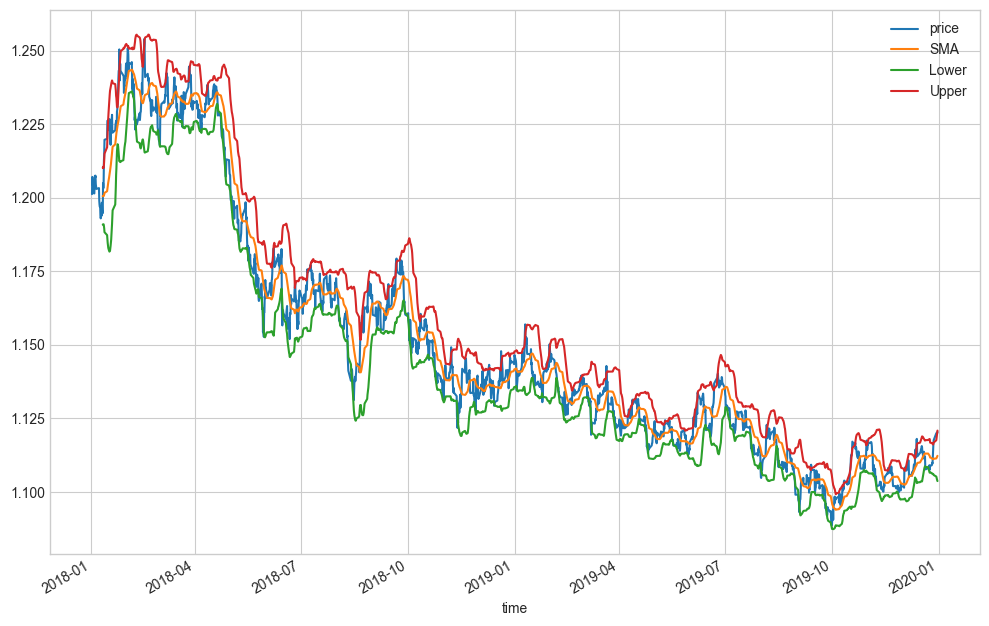

In [19]:
"""nos interesa graficar para visualizar la media móvil y las bandas. Como en el dataframe también está
la columna returns, entonces la eliminamos parq evitar problemas de visualización."""
data.drop(columns = "returns").plot(figsize = (12, 8))
plt.show()

En la gráfica anterior se muestran: el precio de cierre (azul), la media móvil (SMA en naranja) y las bandas superior (rojo) e inferior (verde)

In [20]:
data.dropna(inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2041 entries, 2018-01-11 04:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    2041 non-null   float64
 1   returns  2041 non-null   float64
 2   SMA      2041 non-null   float64
 3   Lower    2041 non-null   float64
 4   Upper    2041 non-null   float64
dtypes: float64(5)
memory usage: 95.7 KB


<Axes: xlabel='time'>

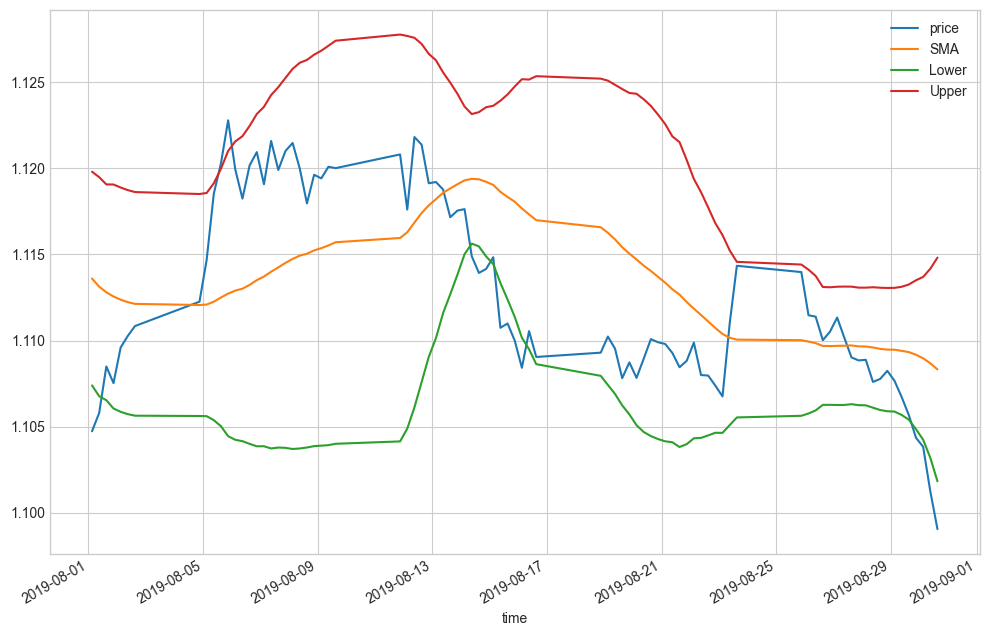

In [22]:
# haciendo zoom en el mes de agosto de 2019
data.drop(columns = "returns").loc["2019-08"].plot(figsize = (12, 8))

La gráfica de arriba nos indica la forma de cambiar posiciones (largo, corto o neutro) para de esta manera entender nuestra estrategia.

Entonces empezamos donde el precio de cierre (línea azul) se encuentra por debajo de la banda inferior que corresponde a una señal de entrar a una posición larga (+1), esta posición se mantiene hasta que el precio cruce la SMA (línea naranja). Desde aqui se asume una posición neutra (sin cambios) hasta que el precio cruce la banda superior.
Cuando esto ocurra, esta es la señal de vender el instrumento (ir en corto), 
Ahora definimos las posiciones del código pandas vectorizado:
  

## # Definir una Estrategia Mean-Reversion con Bandas de Bollinger (2da Parte)

In [23]:
data

,price,returns,SMA,Lower,Upper
time,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122
...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235


In [24]:
data["distance"] = data.price - data.SMA # columna de ayuda

In [25]:
data["position"] = np.where(data.price < data.Lower, 1, np.nan) # 1. sobrevendido ir a largo

In [26]:
data["position"] = np.where(data.price > data.Upper, -1, data["position"]) # 2. sobrecomprado ir a corto

In [27]:
# probar el cruce de la SMA con el precio --> ir a neutro
data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])

In [28]:
data.head(25)

,price,returns,SMA,Lower,Upper,distance,position
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734,NaN
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,NaN
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,NaN
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0
2018-01-12 16:00:00+00:00,1.219680,0.003993,1.201614,1.188280,1.214949,0.018066,-1.0
2018-01-14 22:00:00+00:00,1.220010,0.000271,1.202203,1.187270,1.217135,0.017807,-1.0
2018-01-15 04:00:00+00:00,1.226040,0.004930,1.203023,1.185746,1.220300,0.023017,-1.0


__Explicación del Código Anterior__
Lo primero que hacemos es crear una columna de ayuda, "distancia" para calcular la diferencia entre el precio de cierre la media móvil simple (la banda media), a la final lo que nos importa de este cálculo es el signo.
Por ejemplo, si  el precio (línea azul) es mayor que la SMA (línea naranja) esta distancia es positiva  en caso contrario es negativa, esta es la utilidad de la columna "distancia".
 
Ahora se establecen las reglas usadas para esatablecer  la estrategia:

1ra. Regla: Si el instrumento está sobrevendido se debe comprar (asumir la posición larga) esta situación se da cuando el precio cruza la banda inferior. Entonces aplicamos np.where a los tiempos donde el precio está por debajo de la banda inferior y en estos casos compramos (ir a largo). En todos los demás casos simplemente se crea un valor NaN y se actualiza la columna "position".

 2da. Regla: Si el precio actual es mayor que la banda superior entonces se asume que el instrumento está sobrecomprado y vendemos (ir a corto). En todos los otros casos simplememte se adopta el valor que se obtuvo al ejecutar el comando de la celda anterior (cuando se aplicó la primera regla).

3ra. Regla: Cuando el precio cruza la banda central (la SMA) esta es la señal para ir a neutro. Entonces debemos aplicar un pequeño truco para determinar si el precio cruza la SMA; antes hemos calculado la distancia, luego si el producto de la distancia actual y la distancia inmediatamente anterior es negativo, esto significa que el precio ha cruzado la SMA. El caso contrario implica que el precio no ha cruzado la SMA. Para clarificar: si dos distancias consecutivas son positivas (ambos precios están por encima de la SMA) su producto es positivo (no hay cruce); Si ambas distancias consecutivas son negativas (ambos precios están por debajo de la SMA), su producto también es positivo (no hay cruce). Finalmente, si para dos distancias consecutivas una es positiva (por encima de SMA) y la otra negativa (por debajo de SMA) su producto es negativo (hay cruce) y en caso contrario igual. El código de la celda implica que siempre que el producto de las distancias sea negativo se va a neutro (posición = 0), en todos los demas casos no se cambia el valor que tiene la columna position (resultado del cálculo de la celda anterior).



In [29]:
data

,price,returns,SMA,Lower,Upper,distance,position
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734,NaN
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,NaN
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,NaN
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0


Al examinar los datos del dataframe, nos damos cuenta de que todavía permanecen algunos valores nulos luego en todos los otros casos en los que no son aplicables las reglas 1, 2 y 3 deberíamos adoptar la posición previa, De hecho, desde el punto de vista del código  podemos lograr esto con un relleno hacia adelante usando la función forward fill (ffill()) de tal manera que donde haya valores faltantes, usamos la posición anterior y rellenamos las posiciones anteriores hacia adelante.  

Esto funciona para todos los valores faltantes, excepto para la primera marca de tiempo, porque ahi no existe una posición previa, en este caso le asignamos un cero, o sea una posición neutra y de esta manera tenemos una posición para todas las marcas de tiempo. Esto se implementa por medio de la siguiente celda:

In [30]:
data.position = data.position.ffill().fillna(0) 
# si no aplican las reglas 1, 2, 3 mantenga la posición anterior  

In [31]:
data.head(50)

,price,returns,SMA,Lower,Upper,distance,position
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734,0.0
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0
2018-01-12 16:00:00+00:00,1.219680,0.003993,1.201614,1.188280,1.214949,0.018066,-1.0
2018-01-14 22:00:00+00:00,1.220010,0.000271,1.202203,1.187270,1.217135,0.017807,-1.0
2018-01-15 04:00:00+00:00,1.226040,0.004930,1.203023,1.185746,1.220300,0.023017,-1.0


Ahora relizaremos un conteo de los valores que aparecen en la columna posición :

In [32]:
data.position.value_counts()

position
 0.0    919
 1.0    596
-1.0    526
Name: count, dtype: int64

Se puede ver que los datos contienen 2041 marcas de tiempo. Crudamente, en el 50% de todos los casos tenemos una posición neutral, también en el 25% de los casos tenemos una posición larga y en el 25% restante de los casos tenemos una posición corta.  

Lo que faltaría es realizar una gráfica. Para ello seleccionamos un solo mes (agosto 2019)



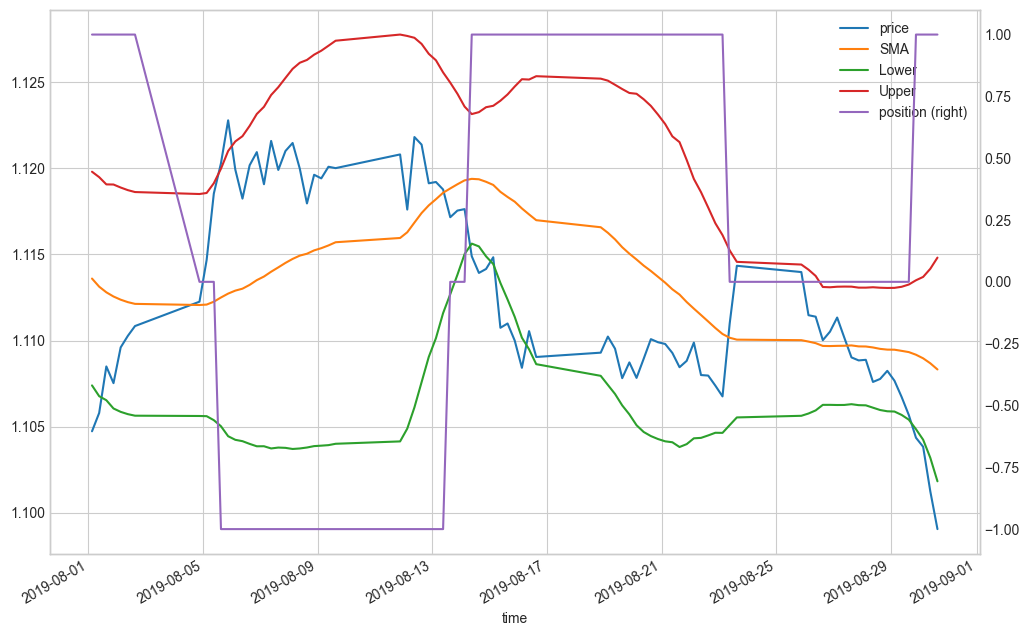

In [33]:
data.drop(columns = ["returns", "distance"]).loc["2019-08"].plot(figsize= (12,8), secondary_y = ["position"])
plt.show()

Análisis de la gráfica anterior:
Tenemos en verde la banda inferior, en azul el precio, en naranja la SMA, en rojo la banda superior y en morado la posición. Recordar que la posición varía entre +1 y -1, pasando por cero entre los cruces del precio con la SMA.  
Incialmente el precio está por debajo de la banda inferior (verde), luego la posición empieza en +1.  

Luego el precio sube  cruza la SMA, entonces la posición va a neutro (0) hasta que el precio cruza la banda superior y la posición va a corto (-1),  

y asi sucesivamente la posición continuará la alternancia entre estos valores.  

También podemos graficar todas las posiciones desde el 2018 hasta el 2019:

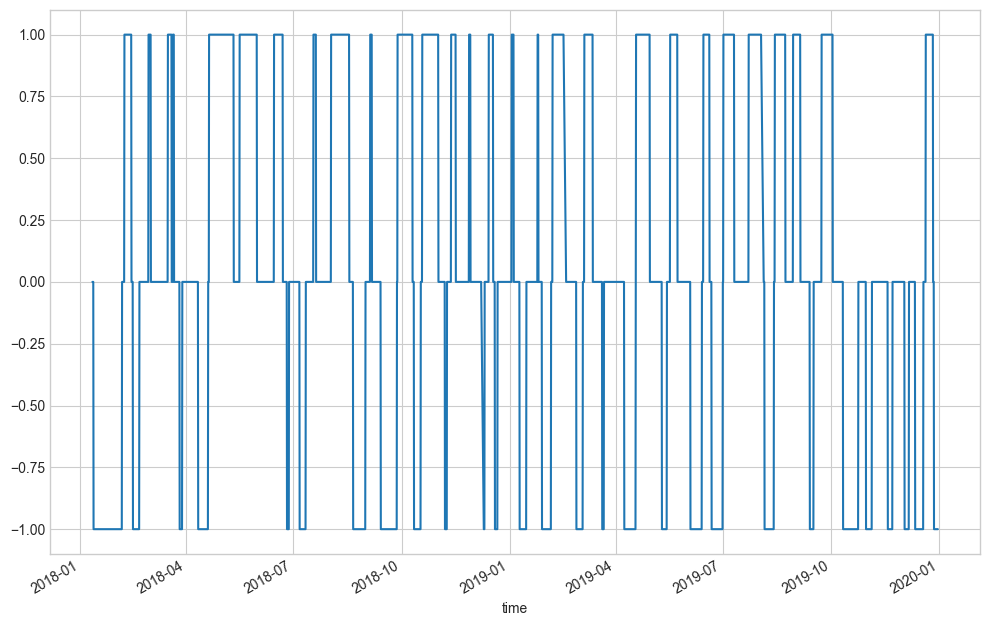

In [34]:

data.position.plot(figsize= (12, 8))
plt.show()


En la gráfica anterior se observan bastantes cambios y algunas operaciones pero no tantas como en el caso de la estrategia contraria simple o de momentum simple. Así que esta estrategia podría ser más rentable que las anteriores.

En la próxima lección haremos el backtesting de esta estrategia con Bandas de Bollinger.


# Backtesting Vectorizado de la Estrategia
En lo que sigue, se va realizar el backtest de la estrategia Mean-Reverse antes de los costos de trading y también considerando los costos netos de operación.

Empezamos examinando los datos con los que venimos trabajando:

In [35]:
data

,price,returns,SMA,Lower,Upper,distance,position
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734,0.0
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0


In [36]:
# como antes se crea la columna strategy con los rendimientos de la estrategia
data["strategy"] = data.position.shift(1) * data.returns

In [38]:
# en el cálculo anterior se generan algunos NaN, por lo que se eliminan
data.dropna(inplace=True)

In [39]:
# chequeamos los datos
data.head(50)

,price,returns,SMA,Lower,Upper,distance,position,strategy
time,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,0.000000
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887
2018-01-12 16:00:00+00:00,1.219680,0.003993,1.201614,1.188280,1.214949,0.018066,-1.0,-0.003993
2018-01-14 22:00:00+00:00,1.220010,0.000271,1.202203,1.187270,1.217135,0.017807,-1.0,-0.000271
2018-01-15 04:00:00+00:00,1.226040,0.004930,1.203023,1.185746,1.220300,0.023017,-1.0,-0.004930
2018-01-15 10:00:00+00:00,1.225980,-0.000049,1.203840,1.184655,1.223026,0.022140,-1.0,0.000049
